### Forecasting

In [120]:
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
 
connection = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=DESKTOP-ATL660H;'
                      'Database=AdventureWorks2012;'
                      'Trusted_Connection=yes;')

#'Driver={SQL Server};'

In [121]:
query ='''
SELECT
A.[LineTotal] as Sales
,A.[UnitPrice]*A.[OrderQty] AS Revenue
,B.OrderDate
,CASE WHEN B.[OnlineOrderFlag] = 0 THEN 'Reseller' ELSE 'Online' END AS Sales_Channel
,C.[Name] AS Region
FROM[Sales].[SalesOrderDetail] AS A
LEFT JOIN [Sales].[SalesOrderHeader] AS B
ON A.[SalesOrderID] = B.[SalesOrderID]
LEFT JOIN [Sales].[SalesTerritory] AS C
ON B.[TerritoryID] = C.[TerritoryID]
WHERE C.[Name] = 'Southwest'
'''
# ,DATEPART (yy, B.[OrderDate]) AS YearFD
# ,DATEPART (mm, B.[OrderDate]) AS MonthFD
# ,DATEPART (qq, B.[OrderDate]) AS QuarterFD
# ,DATEPART (dd, B.[OrderDate]) AS DayFD
# WHERE C.[Name] = 'United Kingdom'
#WHERE C.[Name] IN ('United Kingdom','France', 'Germany')

In [122]:
data= pd.read_sql(query,connection)
data

,Sales,Revenue,OrderDate,Sales_Channel,Region
0,419.4589,419.4589,2011-05-31,Reseller,Southwest
1,419.4589,419.4589,2011-05-31,Reseller,Southwest
2,2146.9620,2146.9620,2011-05-31,Reseller,Southwest
3,356.8980,356.8980,2011-05-31,Reseller,Southwest
4,874.7940,874.7940,2011-05-31,Reseller,Southwest
5,838.9178,838.9178,2011-05-31,Reseller,Southwest
6,419.4589,419.4589,2011-05-31,Reseller,Southwest
7,419.4589,419.4589,2011-05-31,Reseller,Southwest
8,357.1616,357.1616,2011-05-31,Reseller,Southwest
9,419.4589,419.4589,2011-05-31,Reseller,Southwest


In [123]:
cols = ['Revenue','Sales_Channel','Region']
df = data.drop(cols, axis=1, inplace=False)
df.head()
#sales =data.loc[:, data.columns == 'Revenue']

,Sales,OrderDate
0,419.4589,2011-05-31
1,419.4589,2011-05-31
2,2146.9620,2011-05-31
3,356.8980,2011-05-31
4,874.7940,2011-05-31


In [124]:
df = df.set_index(['OrderDate'])

In [125]:
y = df['Sales'].resample('MS').sum()

In [126]:
y.head()

OrderDate
2011-05-01    100755.5317
2011-06-01     69207.0464
2011-07-01    396658.7922
2011-08-01    660089.0001
2011-09-01    113837.0210
Freq: MS, Name: Sales, dtype: float64

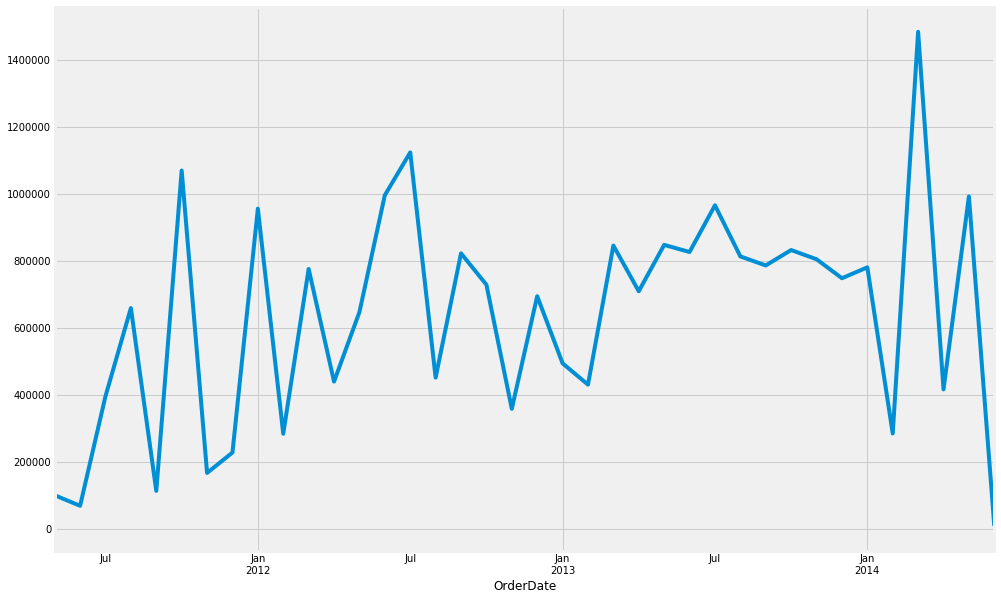

In [127]:
y.plot(figsize=(15, 10))
plt.show()

In [128]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [129]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1105.816501538871
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4054267.9326789454
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:721.7600319287674
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:751.4404841582499
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:725.1026351008875
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:401.1586583242185
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1067.8479633301936
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:689.6228673710259
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:765.3592850425384
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:707.420606091048
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:402.59483231702177
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1049.095829928139
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:710.2433994892513
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:726.6411704416366
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:382.0885641399925
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:998.034388643

In [130]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 model - AIC:716.8176844338323


In [131]:
# print statistics
print(res.aic)
print(res.summary())

716.8176844338323
                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -354.409
Date:                            Thu, 02 Apr 2020   AIC                            716.818
Time:                                    10:50:58   BIC                            721.693
Sample:                                05-01-2011   HQIC                           718.170
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4432      0.381     -1.162      0.245      -1.191       0.305
ma.L1         -0.

In [132]:
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [144]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

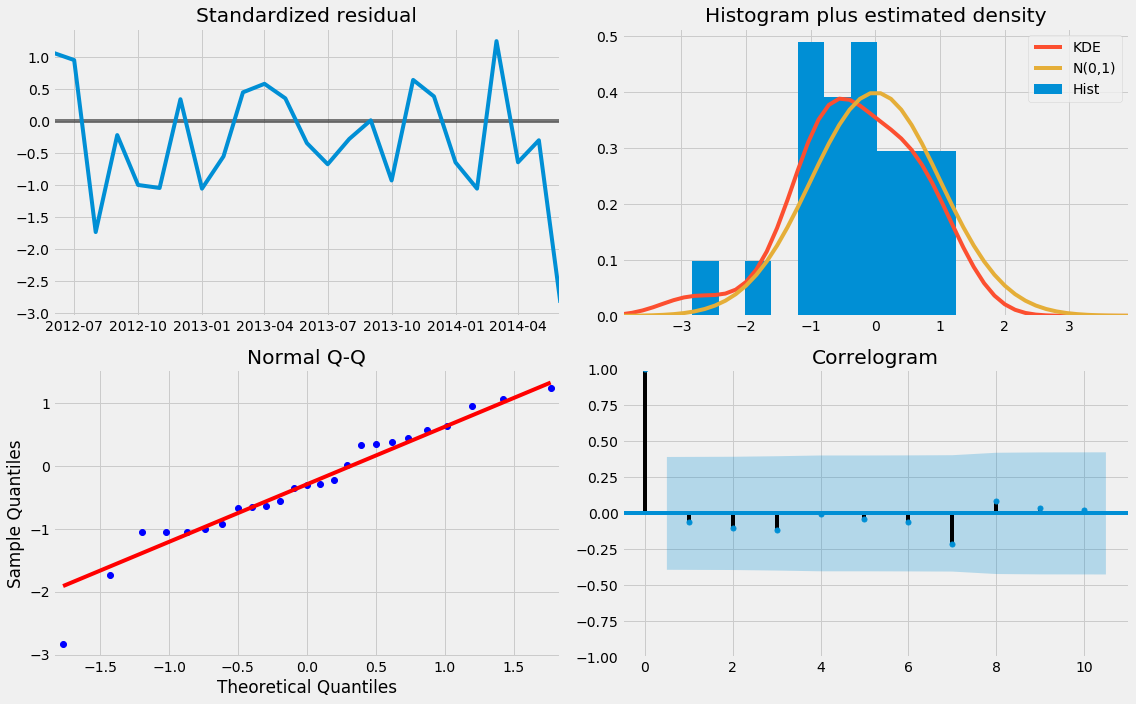

In [134]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

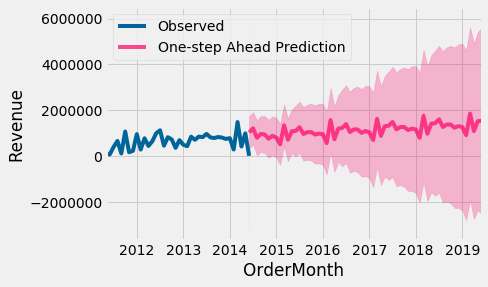

In [135]:
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2014-06-01'), 
                          end=pd.to_datetime('2019-06-01'),
                          dynamic=True)
pred_ci = pred.conf_int()
 
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-06-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

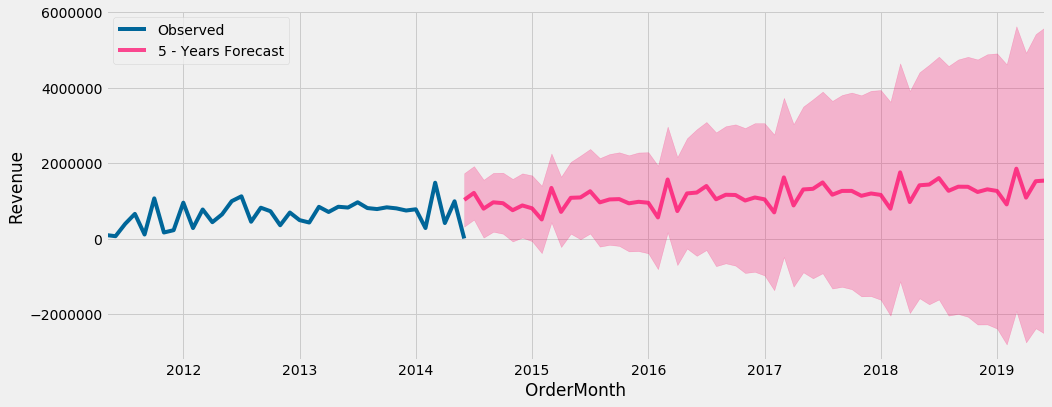

In [136]:
#pred.predicted_mean
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(figsize=(15, 6),label='5 - Years Forecast', alpha=.7, color='#ff0066')
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
#y.plot(figsize=(15, 6))
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [137]:
all_dfs = [y, pred.predicted_mean]

In [138]:
df = pd.DataFrame(np.array(pd.concat(all_dfs).reset_index(drop=False)), columns =  ['Month', 'Revenue'])

In [139]:
df = df.set_index(['Month'])

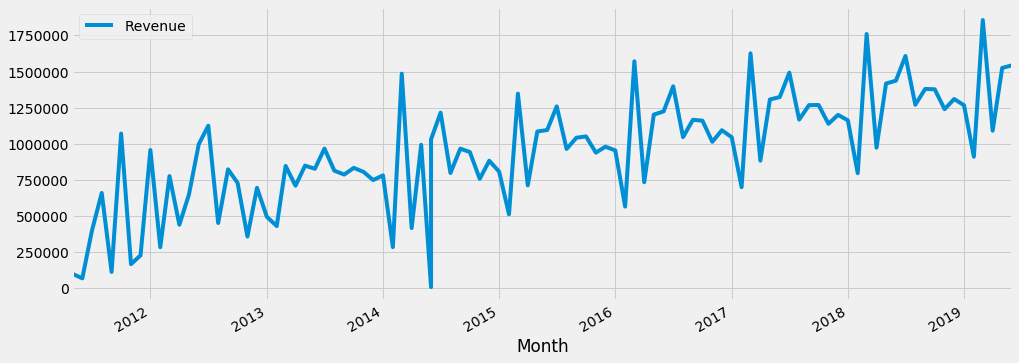

In [140]:
#df.plot(label='Revenue',color='#006699');
df.plot(figsize=(15, 6))

In [141]:
df.head(5)

,Revenue
Month,
2011-05-01,100756
2011-06-01,69207
2011-07-01,396659
2011-08-01,660089
2011-09-01,113837


In [142]:
df.tail(5)

,Revenue
Month,
2019-02-01,911041
2019-03-01,1.85647e+06
2019-04-01,1.0907e+06
2019-05-01,1.52497e+06
2019-06-01,1.54314e+06
